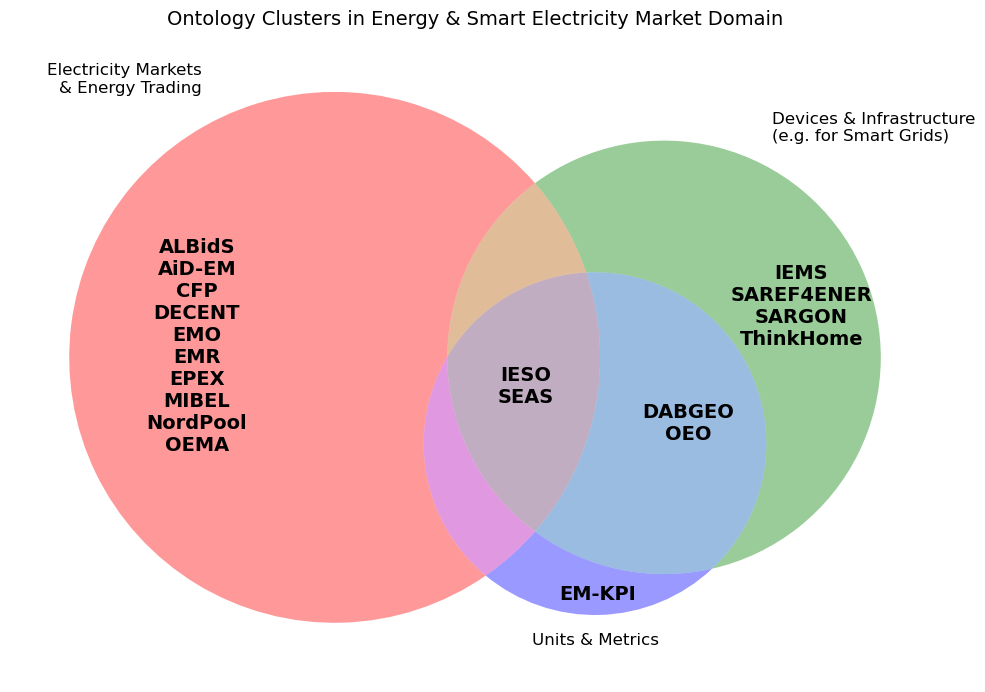

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define groups with acronyms based on classification
markets = {
    "EMO", "MIBEL", "EPEX", "NordPool", "CFP", "EMR",
    "AiD-EM", "ALBidS", "OEMA", "DECENT", "IESO", "SEAS"
}

devices = {
    "ThinkHome", "SARGON", "SEAS", "SAREF4ENER", "IEMS",
    "DABGEO", "OEO", "IESO"
}

metrics = {
    "EM-KPI", "DABGEO", "OEO", "SEAS", "IESO"
}

# Create venn diagram
plt.figure(figsize=(12,10))
venn = venn3(
    [markets, devices, metrics],
    set_labels=(
        "Electricity Markets\n& Energy Trading",
        "Devices & Infrastructure\n(e.g. for Smart Grids)",
        "Units & Metrics"
    )
)

# Replace numbers with ontology acronyms
label_map = {
    "100": markets - devices - metrics,
    "010": devices - markets - metrics,
    "001": metrics - markets - devices,
    "110": (markets & devices) - metrics,
    "101": (markets & metrics) - devices,
    "011": (devices & metrics) - markets,
    "111": markets & devices & metrics
}

# Apply larger bold text
for subset_id, ontos in label_map.items():
    label = venn.get_label_by_id(subset_id)
    if label:
        label.set_text("\n".join(sorted(ontos)))
        label.set_fontsize(14)
        label.set_fontweight("bold")

plt.title("Ontology Clusters in Energy & Smart Electricity Market Domain", fontsize=14)
plt.savefig('OntologyClusters.png')
plt.show()


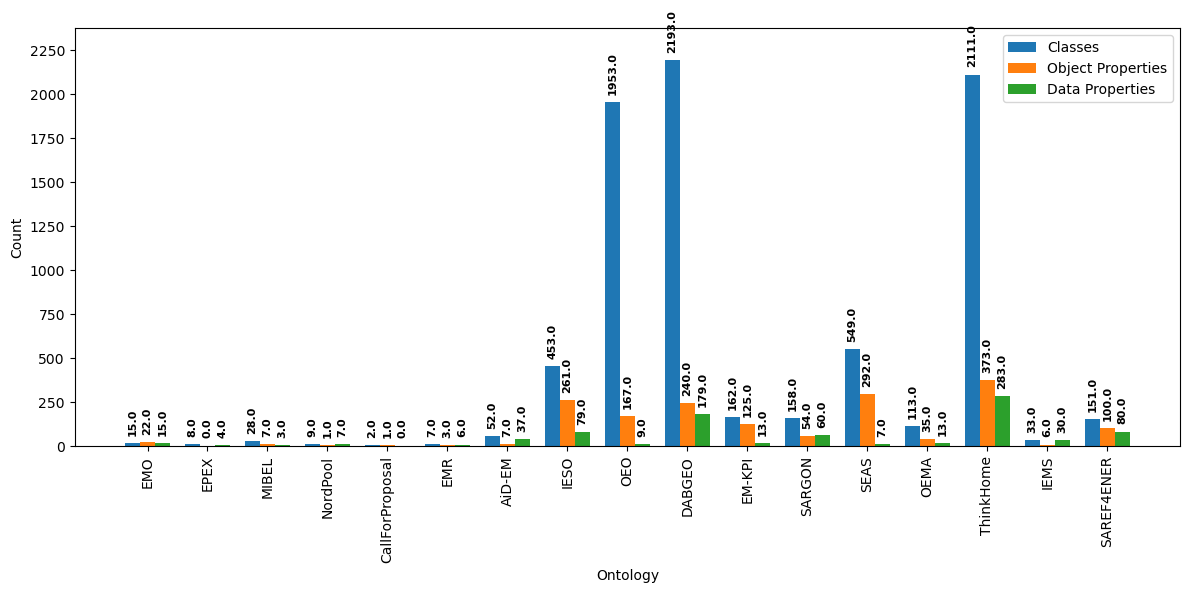

<Figure size 640x480 with 0 Axes>

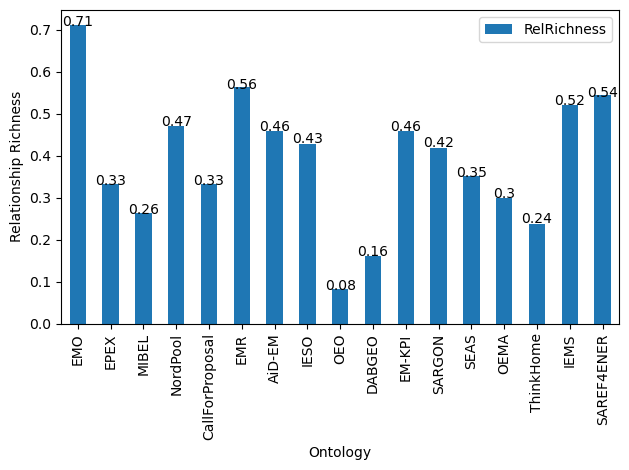

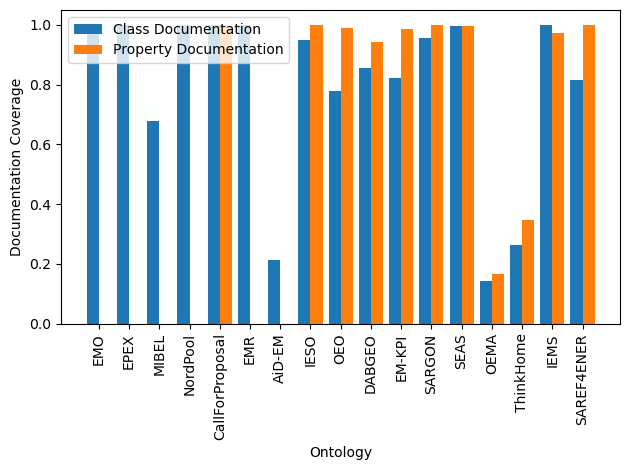

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Compile structural and lexical metrics into a DataFrame.
data = {
    "Ontology": [
        "EMO", "EPEX", "MIBEL", "NordPool", "CallForProposal",
        "EMR", "AiD-EM", "IESO", "OEO", "DABGEO",
        "EM-KPI", "SARGON", "SEAS", "OEMA", "ThinkHome",
        "IEMS", "SAREF4ENER"
    ],
    "NumClasses": [15, 8, 28, 9, 2, 7, 52, 453, 1953, 2193, 162, 158, 549, 113, 2111, 33, 151],
    "NumObjectProps": [22, 0, 7, 1, 1, 3, 7, 261, 167, 240, 125, 54, 292, 35, 373, 6, 100],
    "NumDataProps": [15, 4, 3, 7, 0, 6, 37, 79, 9, 179, 13, 60, 7, 13, 283, 30, 80],
    "RelRichness": [
        0.711538462, 0.333333333, 0.263157895, 0.470588235, 0.333333333,
        0.5625, 0.458333333, 0.428751576, 0.082667919, 0.160413476,
        0.46, 0.419117647, 0.35259434, 0.298136646, 0.23707987,
        0.52173913, 0.543806647
    ],
    # Lexical metrics: class documentation, property documentation, naming conventions
    "ClassDoc": [
        1.0, 1.0, 0.678571429, 1.0, 1.0, 1.0, 0.211538462, 0.949227373,
        0.778289811, 0.855905153, 0.820987654, 0.955696203, 0.996357013,
        0.14159292, 0.264803411, 1.0, 0.814569536
    ],
    "PropertyDoc": [
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.988636364, 0.942446043, 0.985507246, 1.0, 0.996655518,
        0.166666667, 0.347560976, 0.972222222, 1.0
    ]
}

def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha='center')

df = pd.DataFrame(data)

# Create grouped bar positions
bar_width = 0.25
x_positions = np.arange(len(df['Ontology']))

# Set up figure with increased width
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = ax.bar(x_positions - bar_width, df['NumClasses'], width=bar_width, label='Classes')
bars2 = ax.bar(x_positions, df['NumObjectProps'], width=bar_width, label='Object Properties')
bars3 = ax.bar(x_positions + bar_width, df['NumDataProps'], width=bar_width, label='Data Properties')

# Determine maximum height for label offset and ticks
max_height = np.max(df[['NumClasses', 'NumObjectProps', 'NumDataProps']].values)
offset = max_height * 0.02  # 2% of max height

# Add smaller, rotated labels above each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + offset,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=90,
            weight=1000
        )

# Choose a tick step based on max height and round to a 'nice' number (multiples of 50)
target_step = max_height / 10
step = max(50, math.ceil(target_step / 50) * 50)

# Compute next tick above max_height and set y-axis limit
next_tick = math.ceil(max_height / step) * step
ymax = next_tick + step * 0.5  # add extra space above highest tick
ax.set_ylim(0, ymax)

# Set y-axis ticks at multiples of the step
ticks = np.arange(0, next_tick + step, step)
ax.set_yticks(ticks)

# Labels and title
ax.set_xlabel('Ontology')
ax.set_ylabel('Count')
ax.set_xticks(x_positions)
ax.set_xticklabels(df['Ontology'], rotation=90)
ax.legend()

fig.tight_layout()
plt.savefig('ConceptsCount.png')
plt.show()

# Bar chart: relationship richness
plt.figure()
df.plot.bar(x='Ontology', y='RelRichness')
plt.xlabel('Ontology')
plt.ylabel('Relationship Richness')
add_labels(df['Ontology'], df['RelRichness'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('RelationshipRichness.png')
plt.show()

# Compute positions for grouped bars
bar_width = 0.4
x_positions = np.arange(len(df['Ontology']))

plt.figure()

# Plot class documentation coverage
plt.bar(x_positions - bar_width/2, df['ClassDoc'], width=bar_width, label='Class Documentation')

# Plot property documentation coverage
plt.bar(x_positions + bar_width/2, df['PropertyDoc'], width=bar_width, label='Property Documentation')

# Label formatting
plt.xlabel('Ontology')
plt.ylabel('Documentation Coverage')
plt.xticks(x_positions, df['Ontology'], rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('DocumentationCoverage.png')
plt.show()

<Figure size 640x480 with 0 Axes>

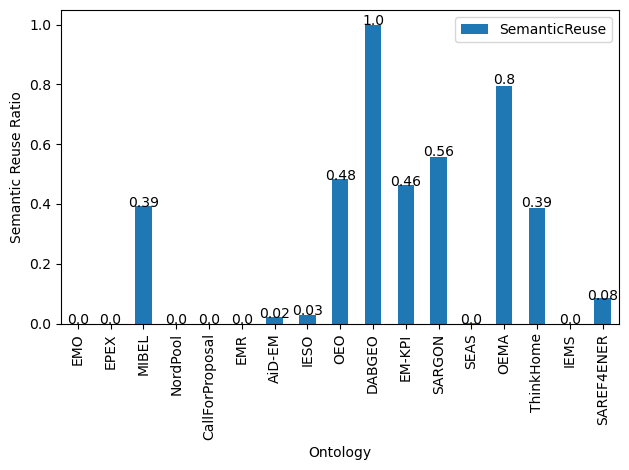

<Figure size 640x480 with 0 Axes>

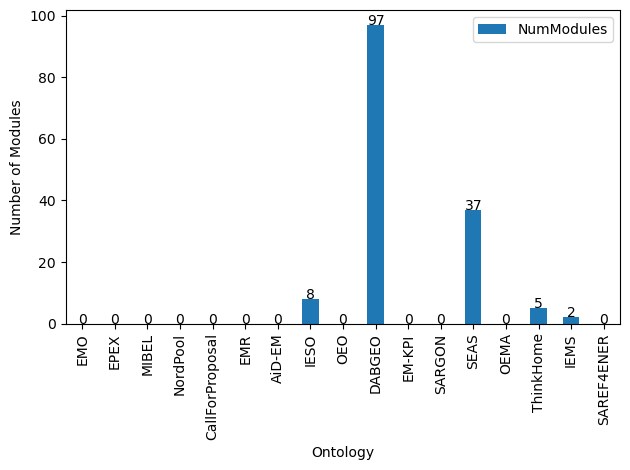

In [73]:
# Reuse ratios and number of imported modules
df_reuse = pd.DataFrame({
    "Ontology": [
        "EMO", "EPEX", "MIBEL", "NordPool", "CallForProposal",
        "EMR", "AiD-EM", "IESO", "OEO", "DABGEO",
        "EM-KPI", "SARGON", "SEAS", "OEMA", "ThinkHome",
        "IEMS", "SAREF4ENER"
    ],
    "SemanticReuse": [
        0.0, 0.0, 0.394736842, 0.0, 0.0, 0.0, 0.020833333,
        0.029003783, 0.482435597, 0.998850575, 0.463333333,
        0.558823529, 0.003537736, 0.795031056, 0.388146007,
        0.0, 0.084592145
    ],
    "NumModules": [
        0, 0, 0, 0, 0, 0, 0, 8, 0, 97, 0, 0, 37, 0, 5, 2, 0
    ]
})

# Plot semantic reuse ratio
plt.figure()
df_reuse.plot.bar(x='Ontology', y='SemanticReuse')
plt.xlabel('Ontology')
plt.ylabel('Semantic Reuse Ratio')
plt.xticks(rotation=90)
add_labels(df_reuse['Ontology'], df_reuse['SemanticReuse'])
plt.tight_layout()
plt.savefig('SemanticReuse.png')
plt.show()

# Plot number of modules
plt.figure()
df_reuse.plot.bar(x='Ontology', y='NumModules')
plt.xlabel('Ontology')
plt.ylabel('Number of Modules')
plt.xticks(rotation=90)
add_labels(df_reuse['Ontology'], df_reuse['NumModules'])
plt.tight_layout()
plt.savefig('NumModules.png')
plt.show()